In [2]:
import pandas as pd
import numpy as np

In [3]:
movie_data = pd.read_csv("movie_metadata.csv")

In [4]:
movie_data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movie_data.shape

(5043, 28)

In [6]:
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

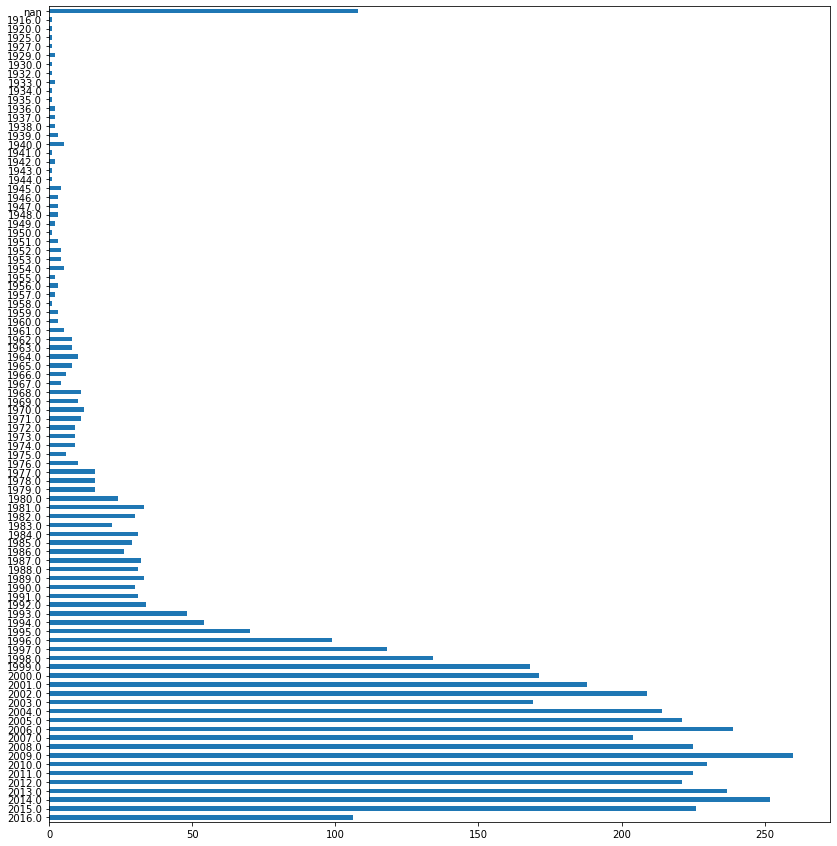

In [7]:
# In this data set, we have movie data only upto 2016
import matplotlib.pyplot as plt
movie_data.title_year.value_counts(dropna = False).sort_index(ascending= False).plot(kind= "barh", figsize=(14,15))
plt.show()

In [8]:
# We will use only the following features for movie recommendation
movie_data = movie_data.loc[:, ["movie_title","genres", "director_name", "actor_1_name", "actor_2_name", "actor_3_name"]]

In [9]:
movie_data.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN


In [10]:
# actor 1,2,3 or director name fields may have null values. So, we'll replace them with "unknown"
movie_data= movie_data.replace(np.nan, "unknown")

In [11]:
movie_data.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown


In [12]:
# removing "|" from genres column and replacing with " "
movie_data.genres = movie_data.genres.str.replace("|", " ")

C:\Users\pranj\AppData\Local\Temp\ipykernel_16672\1378610983.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movie_data.genres = movie_data.genres.str.replace("|", " ")


In [13]:
movie_data.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown


In [14]:
# converting each movie title to lower case
movie_data.movie_title = movie_data.movie_title.str.lower()

In [15]:
movie_data.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,avatar,Action Adventure Fantasy Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,pirates of the caribbean: at world's end,Action Adventure Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,spectre,Action Adventure Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,the dark knight rises,Action Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,star wars: episode vii - the force awakens ...,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown


In [16]:
# Each movie title has a "null terminating character" at the end which we have to remove
movie_data.movie_title[1]

"pirates of the caribbean: at world's end\xa0"

In [17]:
# removing the "null terminating character"
movie_data.movie_title = movie_data.movie_title.str[:-1]


In [18]:
movie_data.movie_title[1]

"pirates of the caribbean: at world's end"

In [20]:
movie_data.to_csv("movie_data.csv", index= False)